In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, random, time

import warnings
warnings.filterwarnings('ignore')

In [45]:
starting_dir = os.getcwd()
print (starting_dir)

/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/0_before_reformat/LPR/2_divide_into_two_sets


In [48]:
# file path only

## mac       - phase I,II - LPR - after_Lisa_plate_id_fix and merged
complete_input_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/latest/after_merging/tall/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall_fixed_merged.csv'
# 344 unique chemical.IDs

## constance - phase I,II - LPR
#complete_input_file_path = '/people/kimd999/tox/phase_I_II/data/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX.csv'

In [49]:
df_behav = pd.read_csv(complete_input_file_path, header = 0)

df_behav['chemical.id'] = df_behav['chemical.id'].astype(str)
# this string retyping is needed for "behav_select_1030 = behav_select.loc[behav_select['chemical.id'] == '1030',:]" later

df_behav = df_behav.rename({'endpoint': 'timepoint'}, axis=1)

df_behav.head()

,chemical.id,conc,plate.id,well,timepoint,value
0,1030,NaN,NaN,NaN,t0,NaN
1,1030,0.0,9414.0,A06,t0,0.0
2,1030,0.0,9414.0,A12,t0,2.7
3,1030,0.0,9414.0,B06,t0,0.5
4,1030,0.0,9414.0,B12,t0,0.0


In [50]:
display(len(np.unique(df_behav['chemical.id'])))

344

In [51]:
# Keep only relevant columns
columns_to_keep = ['chemical.id', 'conc', 'plate.id', 'well', 'timepoint', 'value']
df_select = df_behav.loc[:,columns_to_keep]
df_select.head()
display(len(df_select))

11610480

In [52]:
# [plate.id] float -> int

plate_id_nan = df_select[df_select['plate.id'].isna()]
plate_id_nan['plate.id'] = plate_id_nan['plate.id'].astype(str)
#display(plate_id_nan.head())

plate_id_not_nan = df_select[~np.isnan(df_select['plate.id'])]
#display(plate_id_not_nan.head())

plate_id_not_nan['plate.id'] = plate_id_not_nan['plate.id'].astype(int)
display(plate_id_not_nan.tail())

df_select = pd.concat([plate_id_not_nan, plate_id_nan])
display(df_select.tail())
display(len(df_select))

,chemical.id,conc,plate.id,well,timepoint,value
11610475,998,67.0,15822,A08,t239,0.0
11610476,998,67.0,15822,A09,t239,0.0
11610477,998,67.0,15822,A10,t239,0.0
11610478,998,67.0,15822,A11,t239,0.0
11610479,998,67.0,15822,A12,t239,0.0


,chemical.id,conc,plate.id,well,timepoint,value
11471275,965,NaN,nan,NaN,t235,NaN
11471468,965,NaN,nan,NaN,t236,NaN
11471661,965,NaN,nan,NaN,t237,NaN
11471854,965,NaN,nan,NaN,t238,NaN
11472047,965,NaN,nan,NaN,t239,NaN


11610480

### Divide df into 2 df based on # of timepoints

In [53]:
start_time = time.time()

df_240_timepoints = pd.DataFrame()
df_15_timepoints = pd.DataFrame()
    
len_timepoint = []
    
full_devel = "full"
#full_devel = "devel"

chemical_id_from_here = np.unique(df_select['chemical.id'])
if (full_devel == "devel"):
    randomly_chosen = random.sample(set(chemical_id_from_here), 1)
    chemical_id_from_here = []
    for i in range(len(randomly_chosen)):
        chemical_id_from_here.append(randomly_chosen[i])
        
total_number_of_chemicals_to_processed = len(chemical_id_from_here)
number_of_chemicals_processed = 0

for chemical_index in chemical_id_from_here:
    df_chemical = df_select.loc[df_select['chemical.id'] == chemical_index,:]
    print("\nchemical_index:" + str(chemical_index))
    
    if (len(np.unique(df_chemical['timepoint'])) == 240):
        df_240_timepoints = pd.concat([df_240_timepoints, df_chemical])
    else:
        df_15_timepoints = pd.concat([df_15_timepoints, df_chemical])
    len_timepoint.append(len(np.unique(df_chemical['timepoint'])))
    
    number_of_chemicals_processed += 1
    write_this = str(number_of_chemicals_processed) + " chemicals processed out of " + str(total_number_of_chemicals_to_processed)
    print(write_this)

end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("\nDividing 1 df into 2 dfs is done, it took:"+str(time_took)) 
# took 6~9 minutes for 344 chemicals


chemical_index:1030
1 chemicals processed out of 344

chemical_index:1031
2 chemicals processed out of 344

chemical_index:1105
3 chemicals processed out of 344

chemical_index:1114
4 chemicals processed out of 344

chemical_index:1119
5 chemicals processed out of 344

chemical_index:1161
6 chemicals processed out of 344

chemical_index:1163
7 chemicals processed out of 344

chemical_index:1166
8 chemicals processed out of 344

chemical_index:1167
9 chemicals processed out of 344

chemical_index:1171
10 chemicals processed out of 344

chemical_index:1172
11 chemicals processed out of 344

chemical_index:1174
12 chemicals processed out of 344

chemical_index:1175
13 chemicals processed out of 344

chemical_index:1176
14 chemicals processed out of 344

chemical_index:1177
15 chemicals processed out of 344

chemical_index:1178
16 chemicals processed out of 344

chemical_index:1179
17 chemicals processed out of 344

chemical_index:1180
18 chemicals processed out of 344

chemical_index:118

In [54]:
display(np.unique(len_timepoint))

array([ 15, 240])

In [55]:
display(df_240_timepoints.head())
#display(df_240_timepoints.tail())
display(df_15_timepoints.head())

,chemical.id,conc,plate.id,well,timepoint,value
1,1030,0.0,9414,A06,t0,0.0
2,1030,0.0,9414,A12,t0,2.7
3,1030,0.0,9414,B06,t0,0.5
4,1030,0.0,9414,B12,t0,0.0
5,1030,0.0,9414,C06,t0,0.0


,chemical.id,conc,plate.id,well,timepoint,value
11610475,998,67.0,15822,A08,t239,0.0
11610476,998,67.0,15822,A09,t239,0.0
11610477,998,67.0,15822,A10,t239,0.0
11610478,998,67.0,15822,A11,t239,0.0
11610479,998,67.0,15822,A12,t239,0.0


,chemical.id,conc,plate.id,well,timepoint,value
230880,1119,6.4,1,A8,t3,11.3
230881,1119,0.0,2,F6,t3,0.0
230882,1119,0.0,2,C6,t3,43.4
230883,1119,0.0,2,D6,t3,37.2
230884,1119,6.4,1,G2,t3,0.0


<AxesSubplot:ylabel='count'>

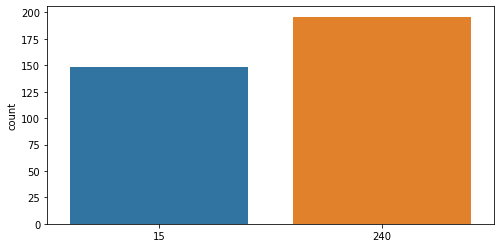

In [56]:
ds = pd.Series({"Column": len_timepoint})
plt.figure(figsize=(8,4))
sns.countplot(x="Column", data=ds)

In [57]:
output_filename = str(complete_input_file_path[:-4]) + "_" + str(full_devel) + "_15_timepoints.csv"
print ("output_filename:"+str(output_filename))
df_15_timepoints.to_csv(output_filename,index=False)

output_filename:/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/latest/after_merging/tall/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall_fixed_merged_full_15_timepoints.csv


In [58]:
output_filename = str(complete_input_file_path[:-4]) + "_" + str(full_devel) + "_240_timepoints.csv"
print ("output_filename:"+str(output_filename))
df_240_timepoints.to_csv(output_filename,index=False)

output_filename:/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/latest/after_merging/tall/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall_fixed_merged_full_240_timepoints.csv


## below is investigational

In [17]:
#display(np.unique(behav_all_data_select['endpoint']))

In [18]:
#reformat_data.head()

In [19]:
#reformat_data.shape

In [20]:
#reformat_data.to_csv('Phase_I_II_t3_t17_LPR.csv',index=False)

In [21]:
###### replace plate id with what is listed in the morphology data to the LPR.
###### for your example, TP967-E9-P1, will go in place of plate.id “1” in the LPR file.

# read morpho data and match/join


In [32]:
display(len(np.unique(df_behav_chemical_w_240_endpoints['chemical.id'])))

display(len(np.unique(df_behav_chemical_w_15_endpoints['chemical.id'])))

196

148

In [34]:
df_behav_chemical_w_240_endpoints_na = df_behav_chemical_w_240_endpoints[df_behav_chemical_w_240_endpoints.isna().any(axis=1)]
display(len(df_behav_chemical_w_240_endpoints_na))

206801

In [36]:
df_behav_chemical_w_15_endpoints_na = df_behav_chemical_w_15_endpoints[df_behav_chemical_w_15_endpoints.isna().any(axis=1)]
display(len(df_behav_chemical_w_15_endpoints_na))

0